# Exercise 1: Dimension reduction with PCA


In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("censusCrimeClean.csv")

In [3]:
df.shape

(1994, 102)

In [4]:
features=df.iloc[:,1:102]

In [5]:
features

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [6]:
y = df.loc[:,['ViolentCrimesPerPop']].values


In [7]:
pca = PCA(n_components=2)
pca.fit(features)


PCA(n_components=2)

In [8]:
pca.explained_variance_ratio_

array([0.67387831, 0.08863102])

In [9]:
scaledFeatures=scale(features, axis=0, with_mean=True, with_std=True, copy=True)

In [10]:
scaledFeatures

array([[-1.56422682,  1.04361188, -0.81499701, ...,  0.13369936,
         0.1673161 , -0.16305118],
       [-1.56422682, -0.45393678, -1.85363638, ..., -0.55581688,
         1.25903177,  1.85475295],
       [-1.56422682, -0.45393678, -0.26512911, ..., -0.11255644,
        -0.61871918,  0.82438488],
       ...,
       [ 1.56841624,  0.80715683, -0.57061128, ...,  0.42920632,
         0.07997885, -0.03425517],
       [ 1.56841624,  0.17661003,  0.2847388 , ...,  0.72471328,
         0.73500825, -0.20598319],
       [ 1.56841624,  1.12243023,  1.9343425 , ...,  0.330704  ,
        -0.4877133 ,  1.0390449 ]])

In [14]:
pcaScaled= PCA(n_components=2)
pca_fit=pcaScaled.fit(scaledFeatures)
pcaScaled=pcaScaled.fit_transform(scaledFeatures)

In [15]:
pcaDF = pd.DataFrame(pcaScaled, columns = ['pca1', 'pca2'])
pcaDF

,pca1,pca2
0,-1.404450,-1.089631
1,1.695902,0.623085
2,2.227930,-2.377956
3,-2.991566,2.018563
4,-5.697298,-2.648549
...,...,...
1989,-3.354935,0.107222
1990,2.340212,9.211274
1991,3.079112,-0.088139
1992,-1.727664,3.395179


In [16]:
pca_fit.explained_variance_ratio_

array([0.25267231, 0.16667711])

In [19]:
pcaScaled.shape

(1994, 2)

In [21]:
df[['ViolentCrimesPerPop']].shape

(1994, 1)

In [31]:
finalDf = pd.concat([pcaDF, df[['ViolentCrimesPerPop']]], axis = 1)


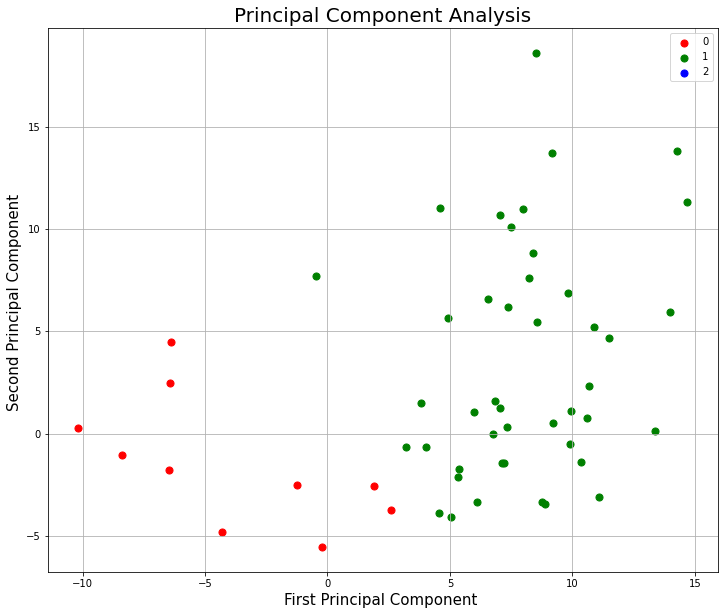

In [32]:
# Visualize Principal Components with a scatter plot
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['ViolentCrimesPerPop'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1'], 
               finalDf.loc[indicesToKeep, 'pca2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()